## the steps involved are as below.

0.Importing the required Libraries.

1.Data gatharing & loading the data.

3.Understanding the data & exploroatory data analysis(EDA).

4.Spliting the Dataset.

5.Feature Engineering And Selection.

6.Model training Evolution & Selection.

7.Model deployment.


# Importing the required Libraries.

In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loading the data

In [106]:
df=pd.read_csv('drug200 (1).csv')

# Understanding the data

In [107]:
df.info() #what is the data type of column?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [108]:
df.shape# size of the data?

(200, 6)

In [109]:
df.sample(15) # how does the data look like ?

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
59,34,M,HIGH,HIGH,18.703,DrugY
24,33,F,LOW,HIGH,33.486,DrugY
38,39,F,NORMAL,NORMAL,9.709,drugX
69,18,F,HIGH,NORMAL,24.276,DrugY
160,30,F,NORMAL,HIGH,10.443,drugX
146,37,F,LOW,NORMAL,12.006,drugX
197,52,M,NORMAL,HIGH,9.894,drugX
44,50,F,NORMAL,NORMAL,12.295,drugX
17,43,M,HIGH,HIGH,13.972,drugA
125,19,F,HIGH,NORMAL,25.969,DrugY


In [110]:
df.isnull().sum() # are there anay missing values?

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [111]:
df.describe() # how does the data look mathematically?

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [112]:
df.duplicated().sum()# Are there any duplicate Values?

0

# exploroatory data analysis(EDA) univariate analysis.

In [113]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

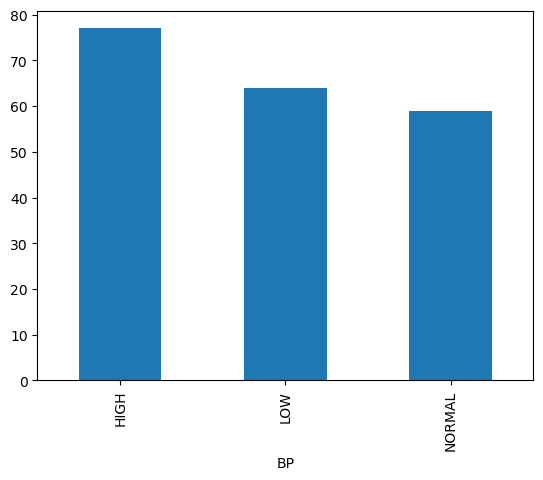

In [114]:
df['BP'].value_counts().plot(kind='bar',);# bar charts

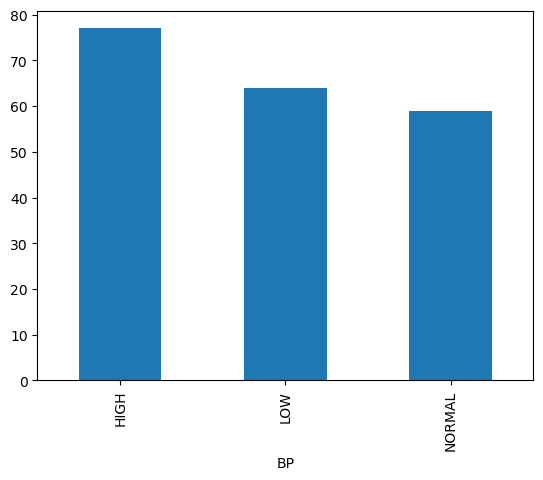

In [115]:
df['BP'].value_counts().plot(kind='bar');

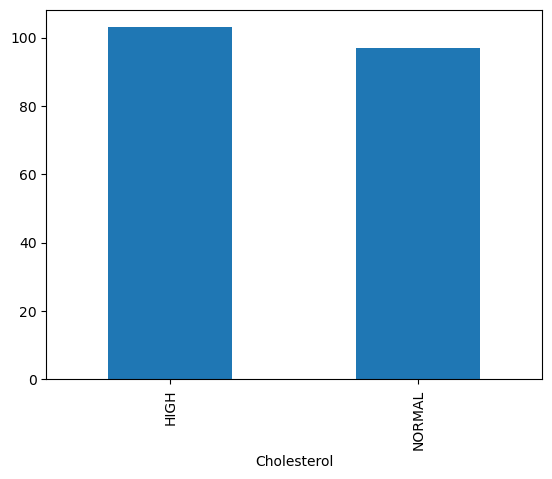

In [116]:
df['Cholesterol'].value_counts().plot(kind='bar',);# bar charts

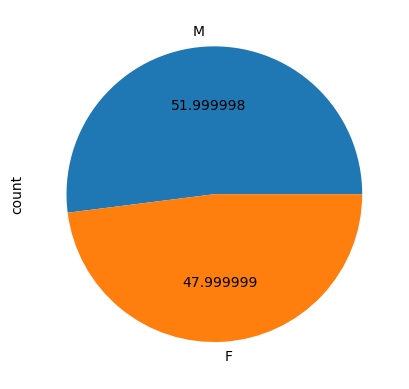

In [117]:
df['Sex'].value_counts().plot(kind='pie',autopct='%2f');

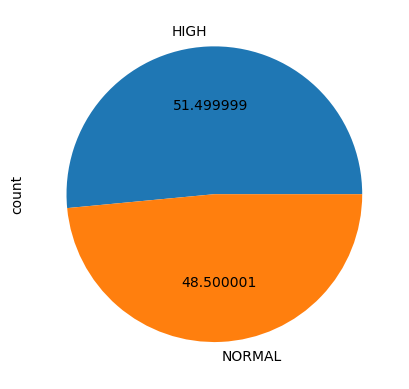

In [118]:
df['Cholesterol'].value_counts().plot(kind='pie',autopct='%2f');

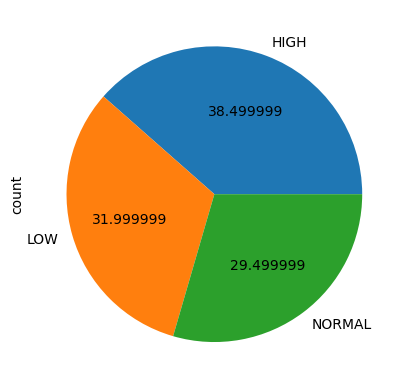

In [119]:
df['BP'].value_counts().plot(kind='pie',autopct='%2f');

### Bivariate analysis & Multivariate Analysis

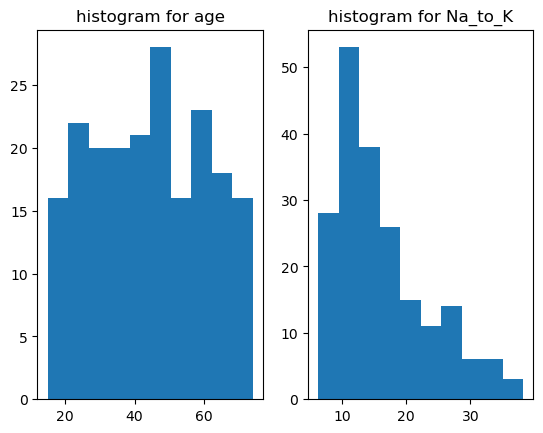

In [120]:
fig, (ax1,ax2) = plt.subplots(1, 2)  #histograms using subplots

ax1.hist(df['Age'])
ax1.set_title('histogram for age')

ax2.hist(df['Na_to_K'])
ax2.set_title('histogram for Na_to_K');



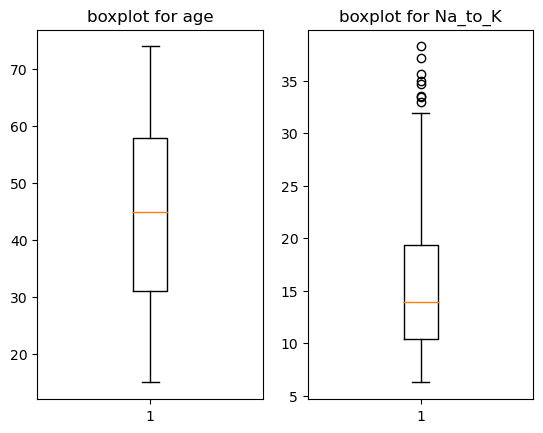

In [121]:
fig, (ax1,ax2) = plt.subplots(1, 2)  #histograms using subplots

ax1.boxplot(df['Age'])
ax1.set_title('boxplot for age')

ax2.boxplot(df['Na_to_K'])
ax2.set_title('boxplot for Na_to_K');


In [122]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

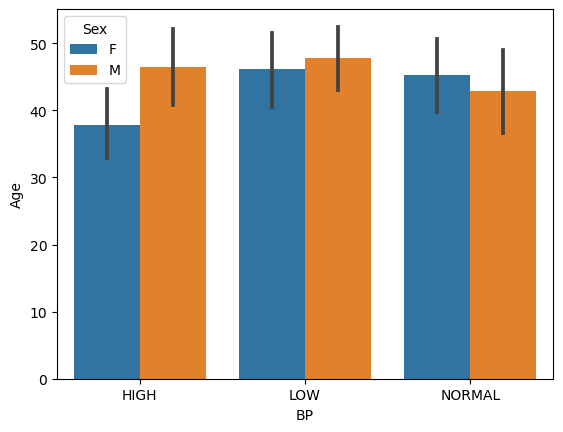

In [123]:
sns.barplot(x=df['BP'],y=df['Age'],hue=df['Sex']);# confidance Intervel

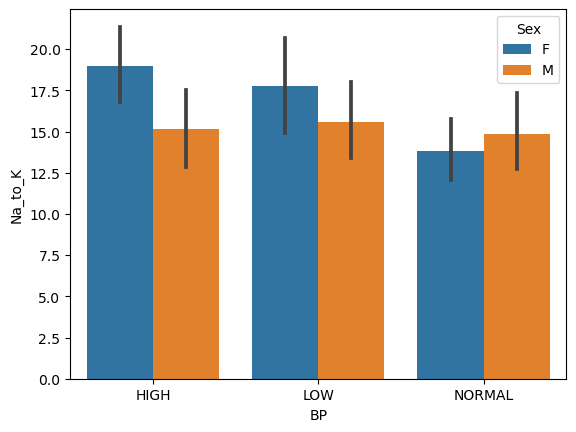

In [124]:
sns.barplot(x=df['BP'],y=df['Na_to_K'],hue=df['Sex']);

<Axes: xlabel='BP', ylabel='Age'>

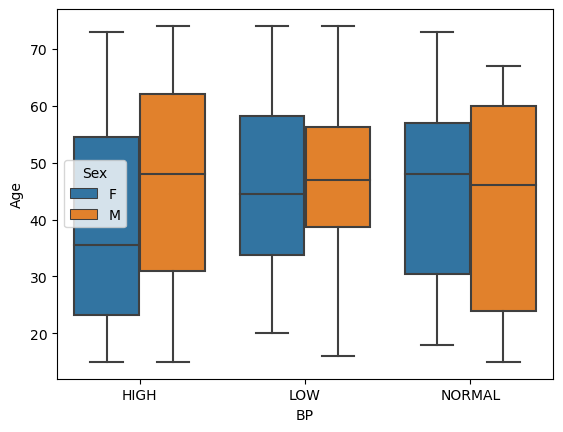

In [125]:
sns.boxplot(x=df['BP'],y=df['Age'],hue=df['Sex'])

<Axes: xlabel='Cholesterol', ylabel='Age'>

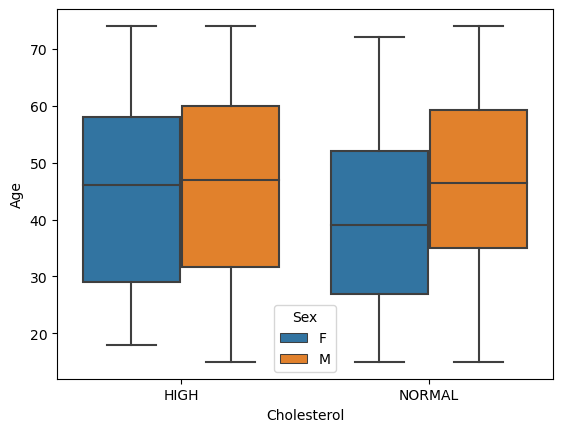

In [126]:
sns.boxplot(x=df['Cholesterol'],y=df['Age'],hue=df['Sex'])

/tmp/ipykernel_6040/206727745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['BP']=='HIGH']['Age'],hist=False);#probabilty density function(pdf)
/tmp/ipykernel_6040/206727745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['BP']=='LOW']['Age'],hist=False);


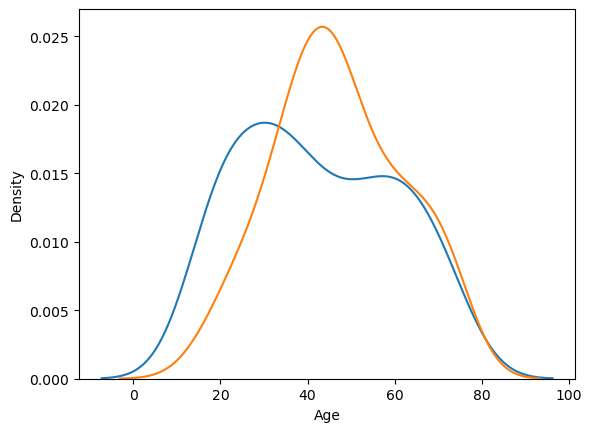

In [127]:
sns.distplot(df[df['BP']=='HIGH']['Age'],hist=False);#probabilty density function(pdf)
sns.distplot(df[df['BP']=='LOW']['Age'],hist=False);

<Axes: xlabel='Cholesterol', ylabel='BP'>

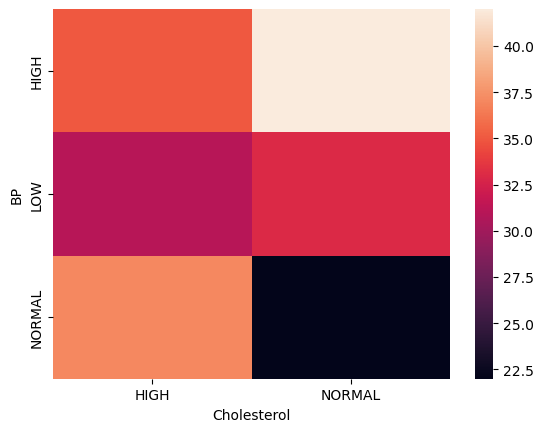

In [128]:
sns.heatmap(pd.crosstab(df['BP'],df['Cholesterol'],))#discovering the relationship between 2 catagorical columns

/Users/pankajbhosale/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


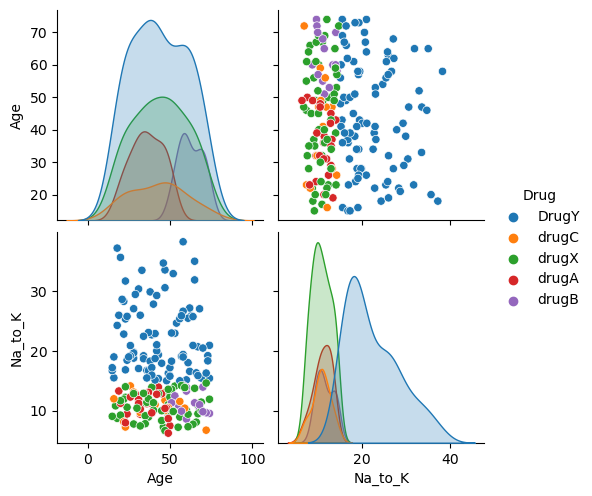

In [129]:
sns.pairplot(df,hue='Drug');

In [130]:
x=df.iloc[:,0:5]# input columns saved in variable X


In [131]:
x.shape

(200, 5)

In [132]:
Y=df.iloc[:,-1] # output column saved in variable Y

In [133]:
Y.shape

(200,)

# spliting the data into train test split 

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,)

In [169]:
ohe=OneHotEncoder(handle_unknown='ignore')#encoding the input columns drop=first will delete the first column because to reduse multicolinartiy 

In [170]:
x_train_new=ohe.fit_transform(x_train).toarray()

In [171]:
x_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [172]:
x_test_new=ohe.transform(x_test).toarray()

In [173]:
x_test_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
y_train

102    drugC
49     DrugY
62     DrugY
141    DrugY
25     DrugY
       ...  
159    drugX
63     drugX
95     drugX
72     drugX
133    DrugY
Name: Drug, Length: 160, dtype: object

In [175]:
y_test

98     DrugY
54     drugB
143    DrugY
165    DrugY
196    drugC
19     DrugY
35     drugX
157    DrugY
55     drugC
21     DrugY
15     DrugY
4      DrugY
111    drugX
36     drugA
41     drugB
131    DrugY
30     drugX
172    DrugY
85     drugB
34     drugX
97     DrugY
149    drugC
29     DrugY
78     drugA
132    drugX
94     DrugY
182    drugX
96     DrugY
59     DrugY
148    drugX
122    DrugY
12     DrugY
13     DrugY
119    DrugY
8      DrugY
90     DrugY
103    drugX
100    drugA
134    DrugY
109    DrugY
Name: Drug, dtype: object

# 6. feature enginneering 
### scaling the data using stadardisation

In [176]:
scaler=StandardScaler()

In [177]:
scaler.fit(x_train_new)# fitting it to only training data 

StandardScaler()

In [178]:
X_train_scaled=scaler.transform(x_train_new)# transfroming it to training as well as testing data set
X_test_scaled = scaler.transform(x_test_new)


# Model training Evolution & Selection.

In [179]:
'''1st we will use KNN

2nd decision tree

3rd random forest

4th SVM (support vector machine)

5th add bosting

6th ensumble learning

'''





'1st we will use KNN\n\n2nd decision tree\n\n3rd random forest\n\n4th SVM (support vector machine)\n\n5th add bosting\n\n6th ensumble learning\n\n'

In [198]:
dt=DecisionTreeClassifier(max_depth=2)
dt_scaled=DecisionTreeClassifier()

In [199]:
dt.fit(x_train_new,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [200]:
ypred=dt.predict(x_test_new)
ypred_scaled=dt_scaled.predict(X_test_scaled)

In [201]:
print('actual',accuracy_score(y_test,ypred))
print('scaled',accuracy_score(y_test,ypred_scaled))

actual 0.55
scaled 0.425
